**Data Splitting**





In [ ]:
import json
import random

# Function to load JSONL files
def load_jsonl(file_path):
    """Loads a JSONL file and returns a list of records."""
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(json.loads(line))
    return data

# Function to split the combined data into training, validation, and test sets
def split_data(data, train_size=2240, val_size=640, test_size=320, seed=42):
    random.seed(seed)
    random.shuffle(data)

    # Split data into training, validation, and test sets
    train_data = data[:train_size]
    val_data = data[train_size:train_size+val_size]
    test_data = data[train_size+val_size:train_size+val_size+test_size]

    return train_data, val_data, test_data

# Step 1: Load training.jsonl and validation.jsonl
train_file_path = '/content/training.json'
val_file_path = '/content/validation.json'

training_data = load_jsonl(train_file_path)
validation_data = load_jsonl(val_file_path)

# Step 2: Combine training and validation data
combined_data = training_data + validation_data

# Step 3: Split the data into training, validation, and test sets
train_data, val_data, test_data = split_data(combined_data)

# Step 4: Display the sizes of the resulting datasets
print(f"Training set: {len(train_data)} posts")
print(f"Validation set: {len(val_data)} posts")
print(f"Test set: {len(test_data)} posts")

# Optional: Save the split datasets to new JSONL files
def save_jsonl(data, file_name):
    """Saves a list of records to a JSONL file."""
    with open(file_name, 'w') as file:
        for record in data:
            file.write(json.dumps(record) + '\n')

# Save split datasets to JSONL files
save_jsonl(train_data, 'train_split.jsonl')
save_jsonl(val_data, 'val_split.jsonl')
save_jsonl(test_data, 'test_split.jsonl')

# Download the split datasets
# from google.colab import files
# files.download('train_split.jsonl')
# files.download('val_split.jsonl')
# files.download('test_split.jsonl')


Training set: 2240 posts
Validation set: 640 posts
Test set: 320 posts


**Preprocessing**

In [ ]:
import json
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary nltk resources (run this only once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define stopwords
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    # Step 1: Lowercase the text
    text = text.lower()

    # Step 2: Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Step 3: Tokenize the text into words
    words = word_tokenize(text)

    # Step 4: Remove stopwords
    words = [word for word in words if word not in stop_words]

    # Step 5: Lemmatize words to their root form
    words = [lemmatizer.lemmatize(word) for word in words]

    # Step 6: Join the processed words back into a string
    cleaned_text = ' '.join(words)

    return cleaned_text

# Function to preprocess the dataset
def preprocess_dataset(file_path):
    preprocessed_data = []

    # Load the JSONL file
    with open(file_path, 'r') as file:
        for line in file:
            data = json.loads(line)

            # Assuming 'targetTitle' and 'targetParagraphs' exist in each entry
            topic = data.get('targetTitle', '')
            paragraphs = ' '.join(data.get('targetParagraphs', []))

            # Preprocess both the topic and paragraphs
            processed_topic = preprocess_text(topic)
            processed_paragraphs = preprocess_text(paragraphs)

            # Store preprocessed data
            preprocessed_data.append({
                'original_topic': topic,
                'original_paragraphs': paragraphs,
                'processed_topic': processed_topic,
                'processed_paragraphs': processed_paragraphs
            })

    return preprocessed_data

# Preprocess the training, validation, and test splits
preprocessed_train = preprocess_dataset('train_split.jsonl')
preprocessed_val = preprocess_dataset('val_split.jsonl')
preprocessed_test = preprocess_dataset('test_split.jsonl')

# Save the preprocessed datasets back to JSONL files
def save_preprocessed_jsonl(data, file_name):
    """Saves preprocessed data to a JSONL file."""
    with open(file_name, 'w') as file:
        for record in data:
            file.write(json.dumps(record) + '\n')

# Save the preprocessed datasets
save_preprocessed_jsonl(preprocessed_train, 'train_preprocessed.jsonl')
save_preprocessed_jsonl(preprocessed_val, 'val_preprocessed.jsonl')
save_preprocessed_jsonl(preprocessed_test, 'test_preprocessed.jsonl')

# Download the preprocessed datasets
# files.download('train_preprocessed.jsonl')
# files.download('val_preprocessed.jsonl')
# files.download('test_preprocessed.jsonl')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import json

# Define some sample test data with topics and paragraphs
test_data = [
    {
        'original_topic': 'AI is transforming healthcare',
        'original_paragraphs': 'Artificial Intelligence is significantly improving diagnostic accuracy in healthcare. Many applications are revolutionizing the way doctors analyze data.',
        'processed_topic': 'ai transforming healthcare',
        'processed_paragraphs': 'artificial intelligence significantly improving diagnostic accuracy healthcare many applications revolutionizing way doctors analyze data'
    },
    {
        'original_topic': 'Climate change is a global concern',
        'original_paragraphs': 'The rapid increase in global temperatures is affecting natural ecosystems. Governments are urged to implement policies to reduce carbon emissions.',
        'processed_topic': 'climate change global concern',
        'processed_paragraphs': 'rapid increase global temperatures affecting natural ecosystems governments urged implement policies reduce carbon emissions'
    },
    {
        'original_topic': 'Self-driving cars are becoming more popular',
        'original_paragraphs': 'Many companies, including Tesla and Waymo, are developing autonomous vehicles. Self-driving cars are expected to reduce accidents caused by human error.',
        'processed_topic': 'selfdriving cars becoming popular',
        'processed_paragraphs': 'many companies including tesla waymo developing autonomous vehicles selfdriving cars expected reduce accidents caused human error'
    }
]

# Save the synthetic test data to a JSONL file
test_file_path = 'synthetic_test_data.jsonl'
with open(test_file_path, 'w') as f:
    for entry in test_data:
        f.write(json.dumps(entry) + '\n')

# Confirm that the file has been saved
print(f"Test data saved as {test_file_path}")


Test data saved as synthetic_test_data.jsonl


In [ ]:
from google.colab import files

# Download the synthetic test data
files.download('synthetic_test_data.jsonl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import json
import joblib
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Load preprocessed data from JSONL file
def load_preprocessed_jsonl(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(json.loads(line))
    return data

# Load the preprocessed test data
test_file_path = 'synthetic_test_data.jsonl'
processed_test_data = load_preprocessed_jsonl(test_file_path)

# Combine topics and paragraphs for TF-IDF transformation
def get_combined_text(data):
    combined_text = []
    for entry in data:
        combined_text.append(entry['processed_topic'] + ' ' + entry['processed_paragraphs'])
    return combined_text

test_combined_text = get_combined_text(processed_test_data)

# Step 1: Load the saved TfidfVectorizer and KMeans model
vectorizer_filename = 'tfidf_vectorizer.joblib'
model_filename = 'kmeans_model.joblib'

vectorizer = joblib.load(vectorizer_filename)  # Load the trained vectorizer
kmeans_model = joblib.load(model_filename)  # Load the trained KMeans model

# Step 2: Transform the test data using the loaded vectorizer
tfidf_test_matrix = vectorizer.transform(test_combined_text)
tfidf_test_array = tfidf_test_matrix.toarray()

# Step 3: Make predictions with the KMeans model on the test data
predicted_clusters = kmeans_model.predict(tfidf_test_array)

# Step 4: Optionally, display some of the results
for i, entry in enumerate(processed_test_data[:5]):  # Display first 5 results
    print(f"Topic: {entry['original_topic']}")
    print(f"Paragraph: {entry['original_paragraphs']}")
    print(f"Predicted Cluster: {predicted_clusters[i]}")
    print("----------")


FileNotFoundError: [Errno 2] No such file or directory: 'synthetic_test_data.jsonl'

**Traning**

Streaming output truncated to the last 5000 lines.
Paragraph: August 8, 2016 | 1:22pm The former Vanderbilt quarterback is set to appear on the SEC Network as a college football analyst this season, and an ESPN executive says Rodgers earned the role on his talent alone. "Our talent office had Jordan on their radar for some time. His name was in the initial group of names that we discussed when looking at people to bring to Charlotte [where the SEC Network is located] for auditions," Senior V.P. Stephanie Druley told SI.com . "He played at Vanderbilt. He played quarterback. We had seen some interviews that he had done. So we reached out to him." Rodgers was unavailable for an audition at the time. Druley claims the network didn’t know what show he was shooting that kept him away, though ABC and ESPN are both owned by Disney. When Aaron Rodgers’ youngest brother finally had his audition, he blew Druley away. "It was clear he had a real passion and a deep knowledge of college football. Th

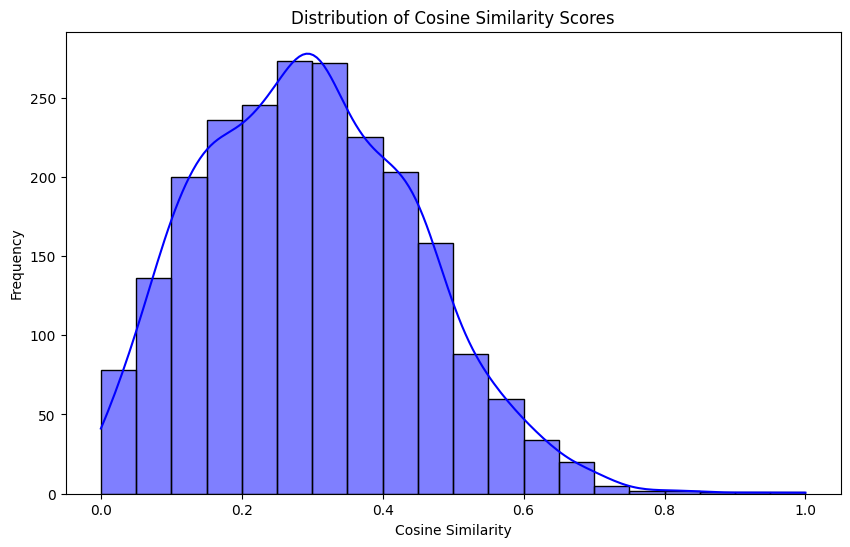

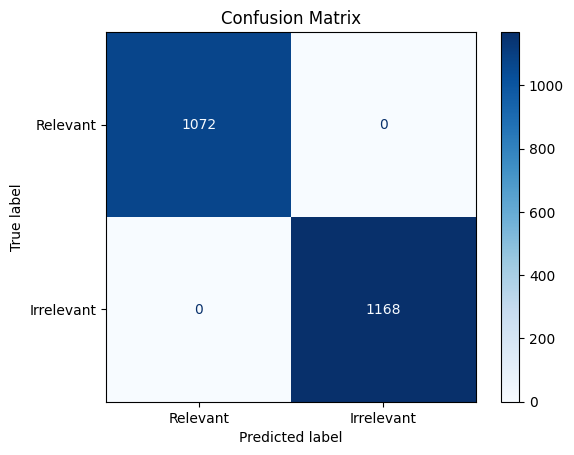

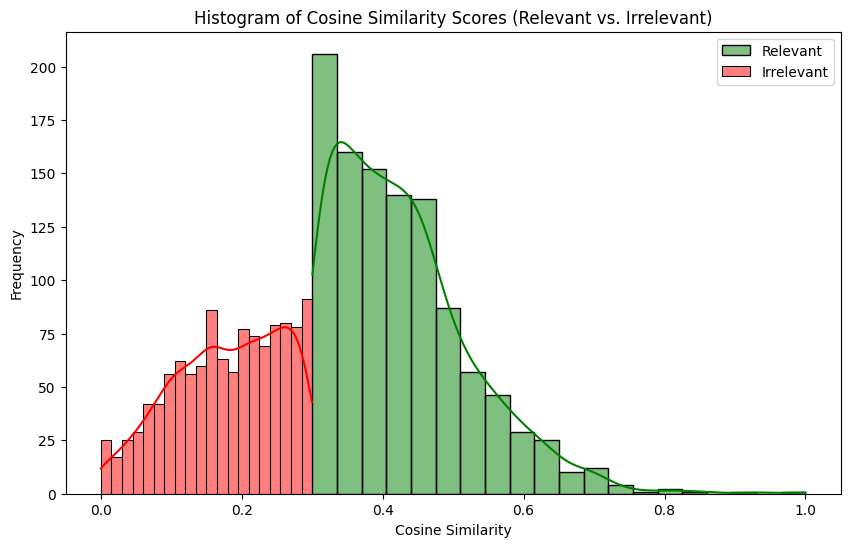

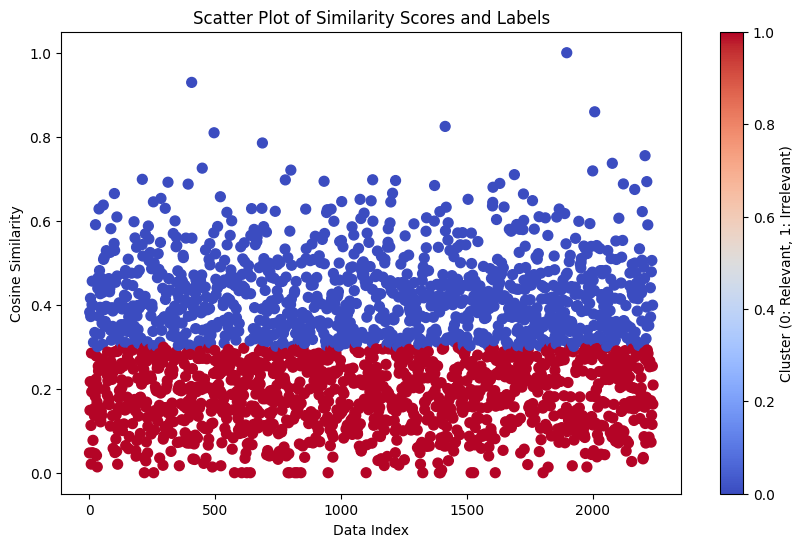

<ipython-input-5-5124627956ec>:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=labels, y=similarity_scores, palette='coolwarm')


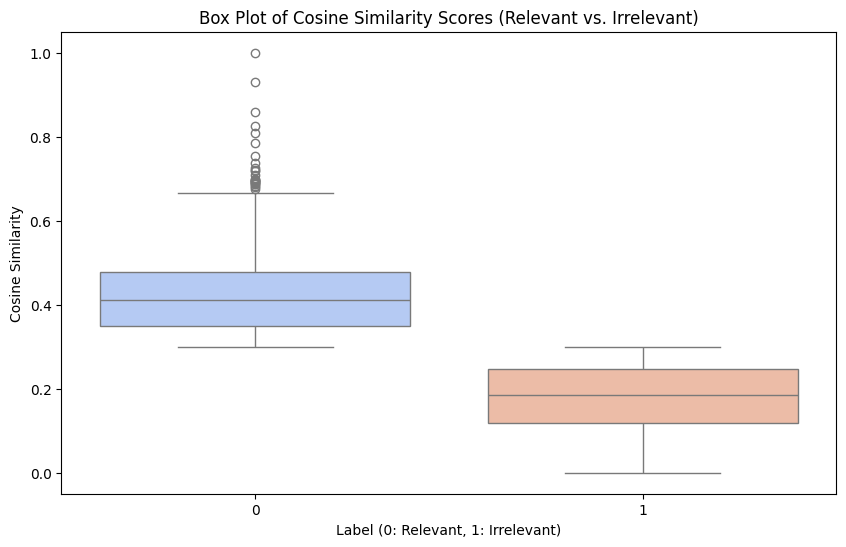

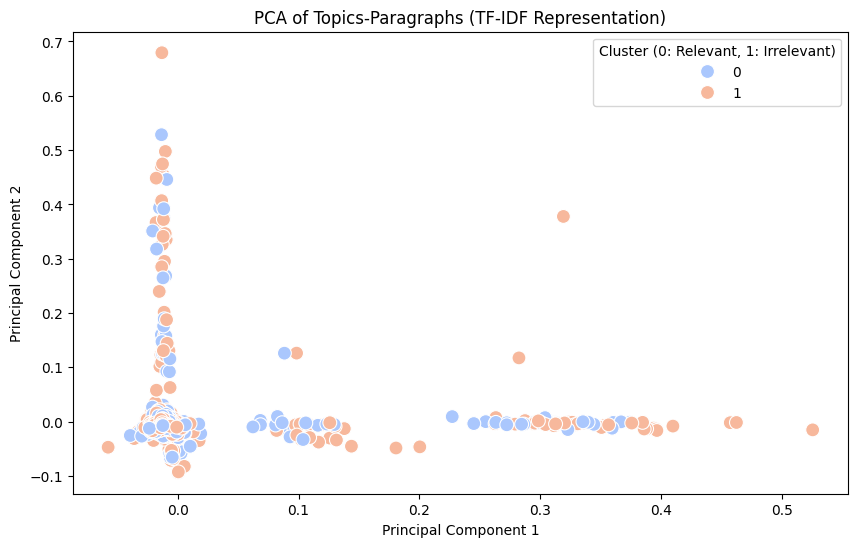

In [ ]:
import json
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load preprocessed data
def load_preprocessed_jsonl(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(json.loads(line))
    return data

# Load the preprocessed datasets
train_file_path = 'train_preprocessed.jsonl'
processed_train_data = load_preprocessed_jsonl(train_file_path)

# Preprocess topics and paragraphs separately for similarity calculation
def get_separate_texts(data, key1, key2):
    topics = [entry[key1] for entry in data]
    paragraphs = [entry[key2] for entry in data]
    return topics, paragraphs

topics, paragraphs = get_separate_texts(processed_train_data, 'processed_topic', 'processed_paragraphs')

# Create the TF-IDF vectorizer and transform the topics and paragraphs separately
vectorizer = TfidfVectorizer(max_features=50000, ngram_range=(1, 2), stop_words='english')
topic_tfidf = vectorizer.fit_transform(topics)
paragraph_tfidf = vectorizer.transform(paragraphs)

# Save the trained vectorizer for future use
vectorizer_filename = 'tfidf_vectorizer.joblib'
joblib.dump(vectorizer, vectorizer_filename)
print(f"TF-IDF Vectorizer saved as {vectorizer_filename}")

# ---- Cosine Similarity Calculation ----
def calculate_cosine_similarity(topic_tfidf, paragraph_tfidf):
    similarities = cosine_similarity(topic_tfidf, paragraph_tfidf)
    return np.diag(similarities)  # Only get the similarity score for the matching pair (topic-paragraph)

# Calculate cosine similarity for each topic-paragraph pair
similarity_scores = calculate_cosine_similarity(topic_tfidf, paragraph_tfidf)

# ---- Binary Classification Based on Cosine Similarity Threshold ----
def classify_based_on_similarity(similarity_scores, threshold=0.3):
    labels = np.where(similarity_scores > threshold, 0, 1)  # 0: relevant, 1: irrelevant
    return labels

# Set a threshold for classification and classify
threshold = 0.3  # You can adjust this threshold for better performance based on data
labels = classify_based_on_similarity(similarity_scores, threshold)

# ---- Function to Display Analysis Results for Each Topic and Paragraph ----
def display_analysis_results(data, similarity_scores, labels):
    print("\n---- Analysis of Topic and Paragraph Relevance ----")
    for i, entry in enumerate(data):
        print(f"Topic: {entry['original_topic']}")
        print(f"Paragraph: {entry['original_paragraphs']}")
        print(f"Similarity Score: {similarity_scores[i]:.4f}")
        print(f"Predicted Label: {'Relevant' if labels[i] == 0 else 'Irrelevant'}")
        print("----------")

# ---- Plot 1: Cosine Similarity Distribution ----
def plot_similarity_distribution(similarity_scores):
    plt.figure(figsize=(10, 6))
    sns.histplot(similarity_scores, kde=True, bins=20, color='blue')
    plt.title('Distribution of Cosine Similarity Scores')
    plt.xlabel('Cosine Similarity')
    plt.ylabel('Frequency')
    plt.show()

# ---- Plot 2: Confusion Matrix ----
def plot_confusion_matrix(labels, true_labels=None):
    if true_labels is None:
        true_labels = labels  # For unsupervised learning, we assume predictions are ground truth

    cm = confusion_matrix(true_labels, labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Relevant', 'Irrelevant'])
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

# ---- Plot 3: Histogram of Cosine Similarity (Grouped by Labels) ----
def plot_histogram_by_labels(similarity_scores, labels):
    plt.figure(figsize=(10, 6))
    sns.histplot(similarity_scores[labels == 0], color='green', label='Relevant', kde=True, bins=20)
    sns.histplot(similarity_scores[labels == 1], color='red', label='Irrelevant', kde=True, bins=20)
    plt.title('Histogram of Cosine Similarity Scores (Relevant vs. Irrelevant)')
    plt.xlabel('Cosine Similarity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# ---- Plot 4: Scatter Plot of Similarity vs. Labels ----
def plot_scatter_similarity_labels(similarity_scores, labels):
    plt.figure(figsize=(10, 6))
    plt.scatter(np.arange(len(similarity_scores)), similarity_scores, c=labels, cmap='coolwarm', s=50)
    plt.title('Scatter Plot of Similarity Scores and Labels')
    plt.xlabel('Data Index')
    plt.ylabel('Cosine Similarity')
    plt.colorbar(label='Cluster (0: Relevant, 1: Irrelevant)')
    plt.show()

# ---- Plot 5: Box Plot of Cosine Similarity (Grouped by Labels) ----
def plot_boxplot_similarity_labels(similarity_scores, labels):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=labels, y=similarity_scores, palette='coolwarm')
    plt.title('Box Plot of Cosine Similarity Scores (Relevant vs. Irrelevant)')
    plt.xlabel('Label (0: Relevant, 1: Irrelevant)')
    plt.ylabel('Cosine Similarity')
    plt.show()

# ---- Optional: PCA Plot to Visualize Clustering in 2D ----
def plot_pca_clusters(topic_tfidf, labels):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(topic_tfidf.toarray())
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette='coolwarm', s=100)
    plt.title('PCA of Topics-Paragraphs (TF-IDF Representation)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster (0: Relevant, 1: Irrelevant)')
    plt.show()

# Display analysis results for each topic and paragraph
display_analysis_results(processed_train_data, similarity_scores, labels)

# Call all plots to analyze the data
plot_similarity_distribution(similarity_scores)
plot_confusion_matrix(labels)
plot_histogram_by_labels(similarity_scores, labels)
plot_scatter_similarity_labels(similarity_scores, labels)
plot_boxplot_similarity_labels(similarity_scores, labels)
plot_pca_clusters(topic_tfidf, labels)


In [ ]:
import json
import torch
from transformers import BertTokenizer

# Load preprocessed data
def load_preprocessed_jsonl(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(json.loads(line))
    return data

# Load the preprocessed dataset
train_file_path = 'train_preprocessed.jsonl'
processed_train_data = load_preprocessed_jsonl(train_file_path)

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Preprocess topics and paragraphs for BERT
def preprocess_for_bert(data, max_length=128):
    input_ids = []
    attention_masks = []
    labels = []

    for entry in data:
        combined_text = entry['processed_topic'] + " [SEP] " + entry['processed_paragraphs']
        encoded_data = tokenizer.encode_plus(
            combined_text,
            add_special_tokens=True,
            max_length=max_length,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        input_ids.append(encoded_data['input_ids'])
        attention_masks.append(encoded_data['attention_mask'])
        labels.append(entry.get('label', 0))  # Use 'label' key if provided, otherwise assume all are relevant (for training)

    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0), torch.tensor(labels)

# Prepare the data
input_ids, attention_masks, labels = preprocess_for_bert(processed_train_data)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad

**BERT model**

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset
from transformers import BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels, test_size=0.1)

# Create DataLoader for the training and validation sets
batch_size = 16

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop
epochs = 3

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")

    # Training
    model.train()
    total_loss = 0

    for step, batch in enumerate(train_dataloader):
        b_input_ids, b_input_mask, b_labels = batch

        model.zero_grad()

        outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        logits = outputs.logits

        total_loss += loss.item()

        # Backward pass
        loss.backward()
        optimizer.step()

    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Training loss: {avg_train_loss}")

    # Validation
    model.eval()
    total_eval_accuracy = 0

    for batch in validation_dataloader:
        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            outputs = model(b_input_ids, attention_mask=b_input_mask)

        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).flatten()

        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        total_eval_accuracy += accuracy

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print(f"Validation Accuracy: {avg_val_accuracy:.2f}%")


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3
Training loss: 0.03761429931148
Validation Accuracy: 100.00%
Epoch 2/3
Training loss: 0.001007605127395234
Validation Accuracy: 100.00%
Epoch 3/3
Training loss: 0.0003370517279974939
Validation Accuracy: 100.00%


In [ ]:
import joblib
import torch

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the model filename and path
model_filename = '/content/drive/My Drive/fine_tuned_bert_model.pth'

# Save the fine-tuned model
torch.save(model.state_dict(), model_filename)
print(f"Model saved as {model_filename}")



Mounted at /content/drive
Model saved as /content/drive/My Drive/fine_tuned_bert_model.pth
